# Get closed shell species to calculate
Find those without QM whose radical has large GAV error

In [1]:
import sys
sys.path.insert(0, "/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0, "..")

import yaml
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt

from tree.parameters import columns

# Load data to join

In [2]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")
resonance_radical_gav_df = pd.read_csv("../data/resonance_radical_gav.csv")

In [3]:
hbi_unc_df

,radical_smiles,resonance_radical_smiles,resonance_radical_num_rotatable_bonds,radical_H298 (kcal/mol),radical_Sint298 (cal/mol/K),radical_source,radical_level_of_theory,radical_Cp300 (cal/mol/K),radical_Cp400 (cal/mol/K),radical_Cp500 (cal/mol/K),...,unc_closed_shell_Cp1500 (cal/mol/K),unc_HBI_H298 (kcal/mol),unc_HBI_Sint298 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),unc_HBI_Cp500 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K)
0,[O]C(=O)OC(O)(O)O,[O]C(=O)OC(O)(O)O,4,-223.514126,95.999974,dong_pio_liang.py,CBS-QB3,33.926878,38.387673,41.508496,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
1,[O]C(O)(O)OC(=O)O,[O]C(O)(O)OC(=O)O,3,-223.423390,92.781436,dong_pio_liang.py,CBS-QB3,32.531179,37.569659,41.498443,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
2,O=C(O)O[C](O)O,O=C(O)O[C](O)O,3,-187.322869,89.517068,dong_pio_liang.py,CBS-QB3,28.973242,34.553073,38.746721,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)O[O],8,-185.660577,132.633380,dong_pio_liang.py,CBS-QB3,56.569703,66.028226,73.603744,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
4,O=[C]OC(O)(O)O,O=[C]OC(O)(O)O,5,-180.497563,90.031975,dong_pio_liang.py,CBS-QB3,32.378191,36.844343,39.334179,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,C1=C[CH]C=1,[C]1=CC=C1,0,156.106582,65.385768,dong_pio_liang.py,CBS-QB3,14.653111,18.488757,21.562144,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
2801,C=C=C1C=[C]C1,C=C=C1C=[C]C1,0,157.733085,77.587625,dong_pio_liang.py,CBS-QB3,22.675255,28.333884,32.976246,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
2802,[CH2]C1=CC#CC1,[CH2]C1=CC#CC1,1,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068
2803,[CH2]C1=CC#CC1,C=C1[CH]C#CC1,0,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,...,2.0,4.176123,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068


In [4]:
resonance_radical_gav_df

,smiles,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(O)(O)O,-214.562847,98.463056,102.023652,29.530765,33.696922,37.199809,39.860612,43.945698,46.705583,51.100899,Thermo group additivity estimation: group(O2s-...
1,[O]C(O)(O)OC(=O)O,-218.506442,100.780822,100.780822,28.957151,32.645296,36.363289,39.621606,44.949522,48.354723,52.797839,Thermo group additivity estimation: group(O2s-...
2,O=C(O)O[C](O)O,-182.366843,95.359992,96.737419,26.444474,30.605583,34.122333,36.909560,40.899044,43.401300,45.798700,Thermo group additivity estimation: group(O2s-...
3,CC(=O)OC(OO)C(=O)C(O)O[O],-198.122312,145.818548,145.246864,50.656616,59.598776,67.892505,73.980363,82.723365,90.133078,97.599981,Thermo group additivity estimation: group(O2s-...
4,O=[C]OC(O)(O)O,-169.366862,91.656926,93.840096,27.460975,30.914895,33.801147,36.038910,39.770268,42.499082,46.915908,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...,...
2800,[C]1=CC=C1,156.830500,62.382873,63.760300,15.164000,18.710000,21.534000,23.741000,26.989000,29.289000,32.814000,Thermo group additivity estimation: group(Cds-...
2801,C=C=C1C=[C]C1,151.763874,52.204958,53.582385,22.076919,28.279266,33.060461,36.665145,41.822263,45.330044,50.563950,Thermo group additivity estimation: group(Cs-(...
2802,[CH2]C1=CC#CC1,160.124000,71.590000,71.590000,22.319000,28.397000,32.609000,37.198000,43.459000,47.876000,52.869000,Thermo group additivity estimation: group(Cs-(...
2803,C=C1[CH]C#CC1,183.114000,79.630000,79.630000,21.319000,26.687000,31.089000,35.058000,41.669000,46.126000,50.759000,Thermo group additivity estimation: group(Cs-(...


# Join table

In [5]:
temp_resonance_radical_gav_df = resonance_radical_gav_df[["smiles", "H298 (kcal/mol)"]]
temp_resonance_radical_gav_df = temp_resonance_radical_gav_df.rename(columns={
    "smiles": "resonance_radical_smiles",
    "H298 (kcal/mol)": "GAV_radical_H298 (kcal/mol)"
})

In [6]:
error_df = hbi_unc_df[["resonance_radical_smiles", "closed_shell_smiles", "radical_H298 (kcal/mol)", "closed_shell_thermo_source"]]
error_df = error_df.rename(columns={"radical_H298 (kcal/mol)": "QM_radical_H298 (kcal/mol)"})
error_df = error_df.merge(temp_resonance_radical_gav_df, on="resonance_radical_smiles", how="left")
error_df

,resonance_radical_smiles,closed_shell_smiles,QM_radical_H298 (kcal/mol),closed_shell_thermo_source,GAV_radical_H298 (kcal/mol)
0,[O]C(=O)OC(O)(O)O,O=C(O)OC(O)(O)O,-223.514126,GAV,-214.562847
1,[O]C(O)(O)OC(=O)O,O=C(O)OC(O)(O)O,-223.423390,GAV,-218.506442
2,O=C(O)O[C](O)O,O=C(O)OC(O)O,-187.322869,GAV,-182.366843
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)OO,-185.660577,GAV,-198.122312
4,O=[C]OC(O)(O)O,O=COC(O)(O)O,-180.497563,GAV,-169.366862
...,...,...,...,...,...
2800,[C]1=CC=C1,C1=CC=C1,156.106582,GAV,156.830500
2801,C=C=C1C=[C]C1,C=C=C1C=CC1,157.733085,GAV,151.763874
2802,[CH2]C1=CC#CC1,CC1=CC#CC1,163.498344,GAV,160.124000
2803,C=C1[CH]C#CC1,C=C1CC#CC1,163.498344,GAV,183.114000


In [7]:
error_df["err_radical_H298 (kcal/mol)"] = (error_df["GAV_radical_H298 (kcal/mol)"] - error_df["QM_radical_H298 (kcal/mol)"]).abs()

In [8]:
error_df = error_df[error_df["closed_shell_thermo_source"]=="GAV"]
len(error_df.index)

1824

In [9]:
error_df = error_df[error_df["err_radical_H298 (kcal/mol)"]>2]
len(error_df.index)

1173

In [10]:
sorted_error_df = error_df.sort_values(by='err_radical_H298 (kcal/mol)', ascending=False)
sorted_error_df

,resonance_radical_smiles,closed_shell_smiles,QM_radical_H298 (kcal/mol),closed_shell_thermo_source,GAV_radical_H298 (kcal/mol),err_radical_H298 (kcal/mol)
2157,[O]C1=C=COO1,OC1=C=COO1,28.429681,GAV,104.231375,75.801694
1985,OC1=C2[CH]OC1OOC2,OC1=C2COOC1OC2,17.822443,GAV,-55.299209,73.121652
2671,C[CH]C1=C=COO1,CCC1=C=COO1,77.078975,GAV,140.971891,63.892917
174,[O]C12OC1(O)O2,OC12OC1(O)O2,-105.019704,GAV,-46.967006,58.052698
1986,O[C]1C2=COC1OOC2,OC1C2=COC1OOC2,17.822443,GAV,-39.165146,56.987589
...,...,...,...,...,...,...
1186,CC(C)(OO)[C]1COOC1,CC(C)(OO)C1COOC1,-26.918196,GAV,-24.896780,2.021416
809,CC(=C[O])C(C)C=O,CC(=CO)C(C)C=O,-48.265404,GAV,-50.285964,2.020559
1055,C[C]1OCC=C(C)O1,CC1=CCOC(C)O1,-34.642062,GAV,-32.621776,2.020286
2629,[CH]1C=CCC1C1C=CC=CC1,C1=CCC(C2CC=CC2)C=C1,72.212401,GAV,70.207000,2.005401


(array([806., 216., 112.,  26.,   5.,   1.,   2.,   2.,   1.,   2.]),
 array([ 2.00220116,  9.38215048, 16.76209979, 24.14204911, 31.52199842,
        38.90194774, 46.28189705, 53.66184637, 61.04179568, 68.421745  ,
        75.80169431]),
 <BarContainer object of 10 artists>)

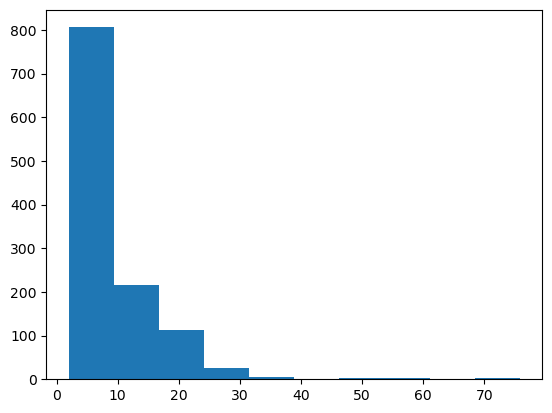

In [11]:
plt.figure()
plt.hist(sorted_error_df["err_radical_H298 (kcal/mol)"])

# Make input files for calculations

In [12]:
closed_shell_smiles_list = sorted_error_df["closed_shell_smiles"].drop_duplicates(keep="first").values
len(closed_shell_smiles_list)

1038

In [26]:
paths = [
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-19_20231219/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_20-49_20231220/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-79_20231221/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-110_20231222/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-140_20231223/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-170_20231225/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-200_20231226/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-230_20231228/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-260_20231229/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-290_20240101/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-320_20240103/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-350_20240105/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-390_20240108/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-480_20240111/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-540_20240116/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-400_20240123/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-410_20240123/input.yml", # waiting
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-420_20240123/input.yml",
    "/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-430_20240123/input.yml",
]

smis_to_exclude = set()

for path in paths:
    with open(path, "r") as f:
        past_input_dict = yaml.load(f, yaml.Loader)
    
    for spc_dict in past_input_dict["species"]:
        smis_to_exclude.add(spc_dict["smiles"])
        
smis_to_exclude.add("OC1=C2COOC1OC2")

In [27]:
input_dict = {}
input_dict["level_of_theory"] = "cbs-qb3"
input_dict["project"] = "project"
input_dict["species"] = []
for smi in closed_shell_smiles_list[:430]:
    
    if smi not in smis_to_exclude:
        spc_dict = {}
        spc_dict["charge"] = 0
        spc_dict["label"] = smi
        spc_dict["multiplicity"] = 1
        spc_dict["smiles"] = smi

        input_dict["species"].append(spc_dict)
    
len(input_dict["species"])

6

In [28]:
project_dir = Path("/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_0-430_20240123")

project_dir.mkdir(exist_ok=True)

with open(project_dir / "input.yml", "w") as f:
    yaml.dump(input_dict, f)

# Notes
- Still need to work on 390 - 430
- Submit 50 species per job